# Benin Solar Dataset EDA
## Profile, clean, and explore Benin solar data for insights.

In [7]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import importlib
import eda
importlib.reload(eda)  # Reload to ensure latest module

<module 'eda' from 'c:\\Users\\Lidya\\Documents\\projects\\solar-challenge-week0\\scripts\\eda.py'>

## Loading Data

In [8]:
import pandas as pd
# Load data
file_path = '../data/benin-malanville.csv'
df = eda.load_data(file_path)

# Check if data loaded successfully
if df is None or not isinstance(df, pd.DataFrame):
    print("Failed to load data. Check file path.")
else:
    print("Data loaded successfully!")
df.head()

   

Data loaded successfully!


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing Values
Stats for numeric columns, flag columns with >5% nulls.

In [9]:
# Define key columns and country name
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust', 'WD', 'RH']
country_name = 'Benin'

# Summarize statistics
summary_stats = eda.summarize_statistics(df)  # Use eda.sum_stat if using original eda.py
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

## Outlier Detection & Cleaning
Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; handle negatives, missing values.

In [10]:
# Detect negative and missing values
eda.detect_outliers_and_missing(df, key_columns)

# Z-score Computing
eda.calculate_z_scores(df,key_columns)

# Cleaning
df_clean = eda.clean_data(df, key_columns, country_name)



Negative Values in Key Columns:
GHI: 258847 negative values (49.25%)
DNI: 275987 negative values (52.51%)
DHI: 259182 negative values (49.31%)

Columns with >5.0% Nulls: None

Outliers (|Z|>3): 7828 rows
Cleaned DataFrame Shape: (246878, 19)
Remaining Negatives in Key Columns:
GHI: 0
DNI: 0
DHI: 0
Tamb: 0
TModA: 0
TModB: 0
WS: 0
WSgust: 0
WD: 0
RH: 0
Cleaned data exported to ..\data\benin_clean.csv


## Time Series Analysis
Plot GHI, DNI, DHI, Tamb vs. Timestamp; analyze patterns.

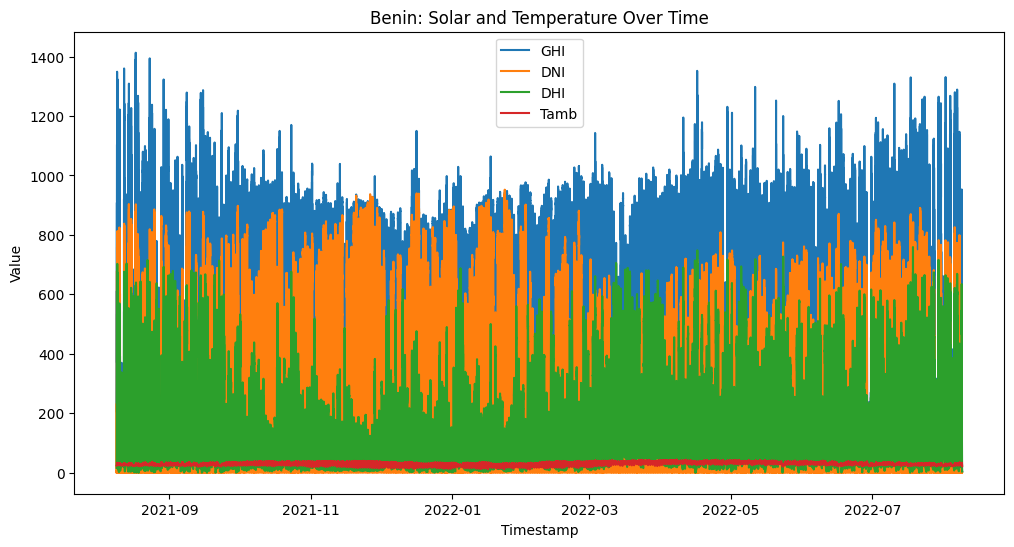

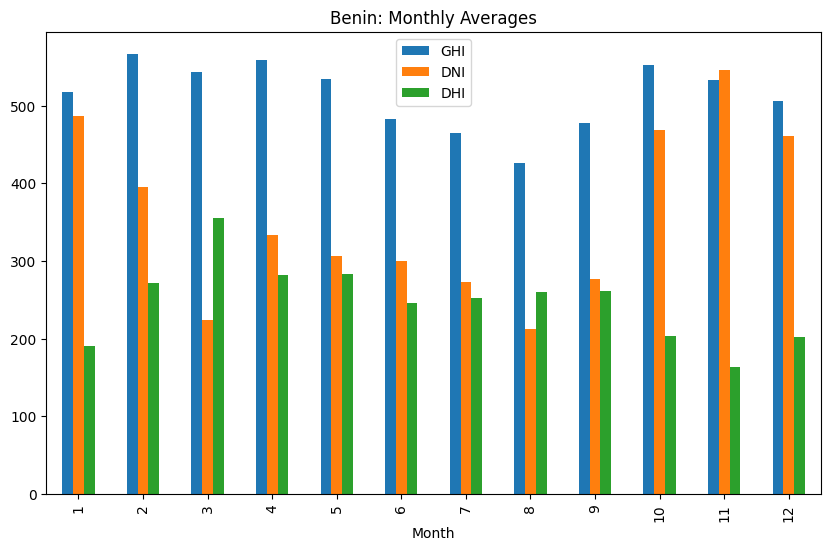

In [11]:
eda.plot_time_series(df_clean, country_name)

## Cleaning Impact
Average ModA, ModB by Cleaning flag.

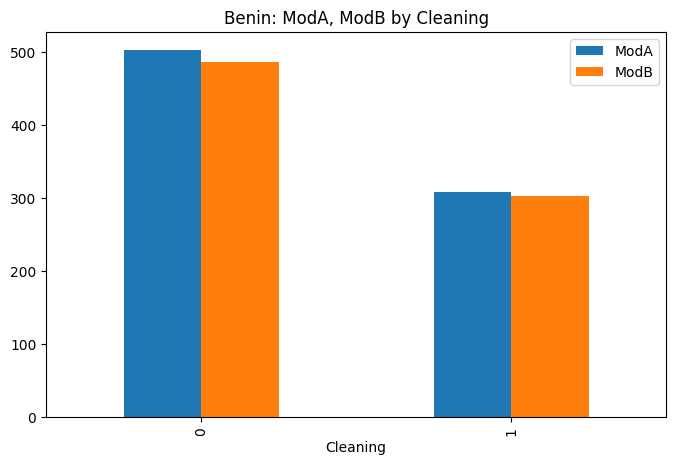

In [12]:
eda.plot_cleaning_impact(df_clean, country_name)

## Correlation Analysis
Heatmap for GHI, DNI, DHI, TModA, TModB.

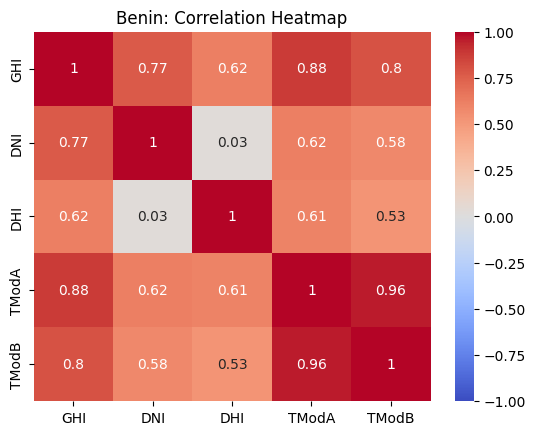

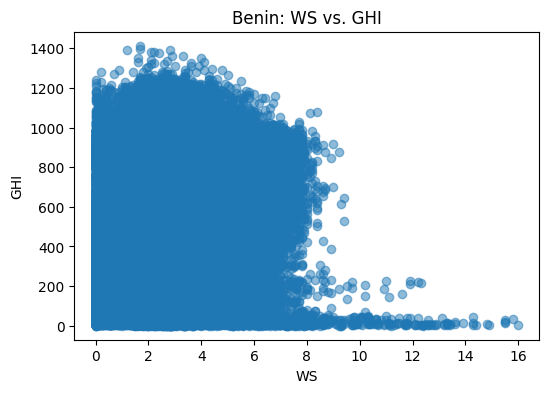

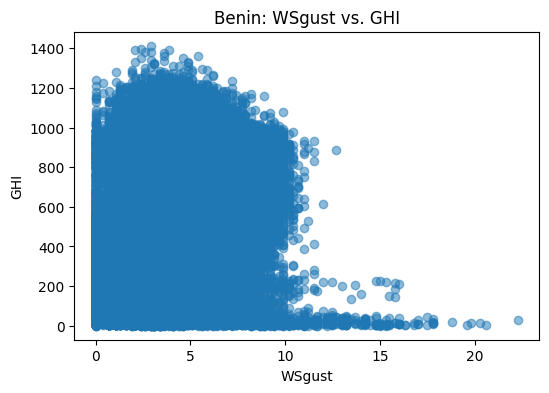

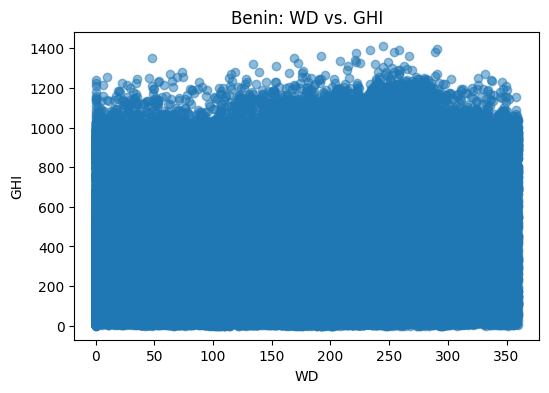

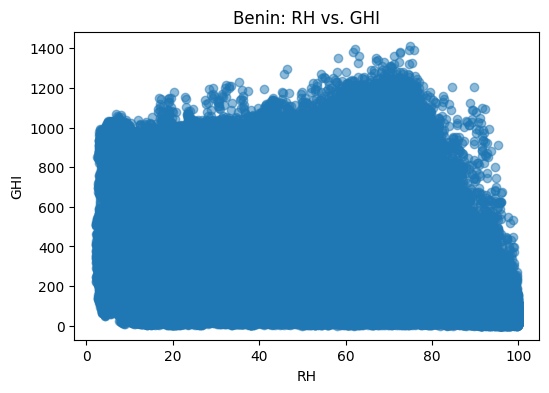

In [13]:
eda.analyze_correlations(df_clean,country_name)

## Wind & Distribution Analysis
Wind rose for WS/WD, histograms for GHI, WS.

In [14]:
# Windrose for WS/WD
eda.plot_wind_rose(df_clean,country_name)

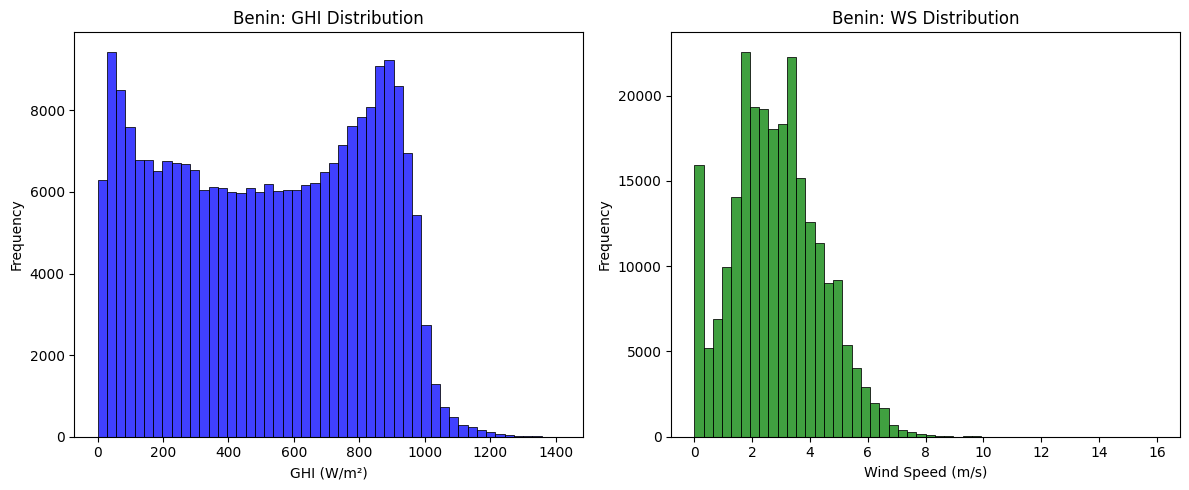

In [15]:
# Histogram for GHI and WS
eda.plot_distributions(df_clean,country_name)

## Temperature Analysis
RH influence on Tamb, GHI.

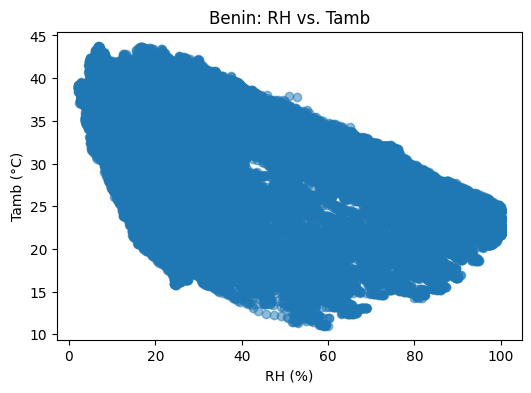

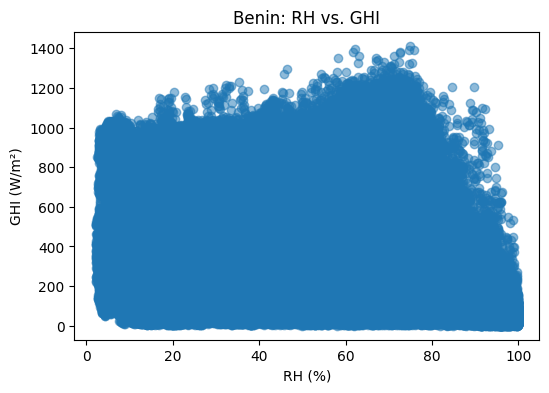

In [16]:
# Scatter plot of RH vs Tamb || RH vs GHI
eda.plot_temperature_relations(df_clean,country_name)

## Bubble Chart
GHI vs. Tamb, bubble size = RH.

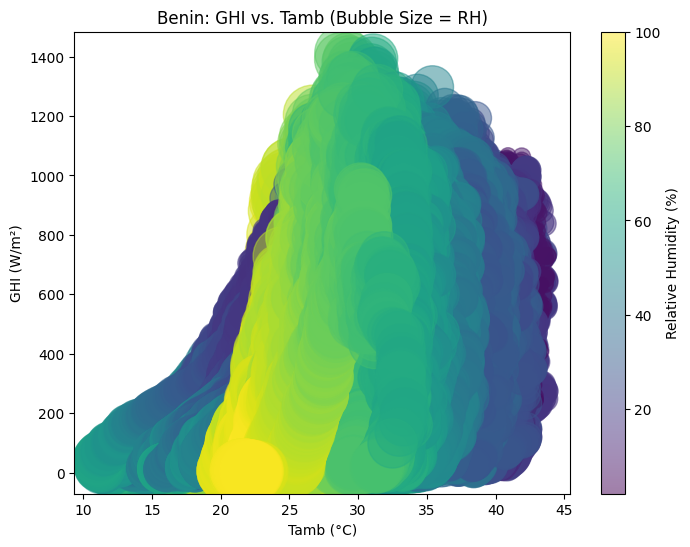

In [17]:
# Bubble chart: GHI vs. Tamb, bubble size = RH
eda.plot_bubble_chart(df_clean, country_name)